# *Introdução ao AB Testing* - PA James

## Passo 1: Escolha do método

 - 01 - Teste de hipótese estatística: método de inferência estatística usado para decidir se os dados são suficientes para suportar uma hipótese particular.
 
 - 02 - AB_Testing: metodologia de pesquisa da experiência do usuário que aplica as hipotéses estatísticas para comparar duas ou mais versões de uma única variável, a fim de determinar qual das duas variantes é mais efetiva.
 
 

## Passo 2: Design do Experimento

     1.2.1 Formulação das hipóteses
     
        - Definição da hipótese nula;
        - Definição da hipótese alternativa;
        - Escolha do tipo de teste: uma ou duas caudas;
        - Definição do nível de confiança do experimento;
        
     1.2.2 Escolha da variável
     
        - Definição da métrica de avaliação ou variável dependente;
      
     1.2.3 Separação dos grupos
     
        - Separação do grupo de controle;
        - separação do grupo de tratamento;
        - Definição do tamanho da amostra de cada grupo;

## Passo 3: Coletando e preparando os dados

    1.3.1 Coleta dos dados
    
        - Definição da estrutura da coleta e armazenamento dos dados;
        - Criação da flag do teste AB
        - Escolha das ferramentas do teste AB
        
    1.3.2 Preparação dos dados
    
       - Definição;
       - Limpeza e verificação dos dados;
       
    1.3.3 Conversão dos grupos
    
       - Cálculo da conversão do grupo controle;
       - Cálculo da conversão do grupo de tratamento;

## Passo 4: Testando as hipóteses

    1.4.1 Definição do método de inferência estatística;
    
       - t-Teste
       - ANOVA
       - Chi-Squared
       
    1.4.2 Cálculo do p-valor
    
    

## Passo 5: Tirando as conclusões

    - Interpretação do p-valor;
    - Validação das hipóteses iniciais;
    - Conclusão: 
            1 - A página A é melhor que a página B
            2 - A diferença de conversão: pelos dados disponíveis, não tenho como dizer se é efeito da página;
    - Cálculo do número de vendas potencial;
    - Cálculo do faturamento potencial;

# Formulando as Hipóteses

### Certifique-se de formular as hipóteses no início do projeto;

###  Daddo que nós não sabemos se o nosso design irá perfomar melhor ou pior (ou igual?) do que o design atual, nós escolhemos o teste BICAUDAL

    - H0: p  =  p0 onde p e p0 são a conversão do novo e do antigo design, respectivamente
    - Ha: p != p0 

### Nós também estabelecemos o nível de confiança de 95% alpha = 0,05

     - o valor de alpha é uma linha de corte que nós estabelecemos, pela qual nós dizemos: 'se a possibilidade de observar um resultado extremo ou mais (p-valor) for menor que alpha, então rejeitamos a hipótese nula alpha = 0,05 (5% de probabilidade)
     
     - Nós queremos estar 95% confiantes de que é estatísticamente diferente do nosso design antigo, antes de rejeitar a hipótese nula;

# Escolhendo as variáveis

 - Para o nosso teste, nós precisamos de 2 grupos:  
 
      **um grupo controle:** eles verão o design antigo;
      
      **um grupo de tratamento:** eles verão o design novo;
      
      
 - Está será a nossa variável independente X

- Para nossa variável dependente Y, nós estamos interessados em capturar a taxa de conversão.
- Um caminho que podemos usar é tratar cada seção de usuário como uma variável binária:

    0: o usuário não comprou o produto durante a seção;
    
    1: o usuário comprou o produto durante a seção;

# Escolhendo o tamanho da amostra

- É interessante notar que, como nós não testamos toda a nossa base de usuários (nossa população), a taxa de conversão que nós temos será inevitavelmente apenas uma estimativa da taxa verdadeira.

- O número de pessoas que nós decidirmos capturar em cada grupo terá um efeito na precisão da nossa estimativa de taxa de conversão: quanto maior o tamanho da amostra, mais precisa será nossa estimativa (i.e. menor o nosso intervalo de confiança) e maior a chance de detectar uma diferença entre os dois grupos, se houver. Por outro lado, quanto maior a nossa amostra, mais caro (e impraticável) nosso estudo se torna.

- Então, quantas pessoas deveríamos ter em cada grupo? O tamanho da amostra que precisamos é estimado através de algo chamado POWER ANALYSIS, e isso depende alguns fatores:

    - **POWER OF TEST:** (1 - Beta) Representa a probabilidade de encontrar uma diferença estatística entre os grupos em nosso teste quando a diferença está de fato presente. Ele é usualmente setado em 0.8 por conversão; Setar este parâmetro em 0.8, na prática, significa que se existe uma diferença real na taxa de conversão entre nossos designs, supondo que a diferença seja a que estimamos (13% e 15%), temos cerca de 80% de chance de detectá-la como estatísticamente significativa em nosso teste com o tamanho de amostra que vamos calcular.
    
    - **ALPHA VALUE:** (alpha) Valor crítico que setamos anteriormente em 0.05. Nível de significância - significa que temos 5% de chance de tomar uma decisão errada (eu tenho evidências sufucuentes para observar o efeito sendo que o efeito não está no intervalo).
    
    - **EFFECT SIZE:** Quanta diferença esperamos que haja entre as taxas de conversão. Como nosso time ficaria feliz com uma diferença de 2%, nós podemos usar 13 e 15% para calcular o tamanho do efeito que nós esperamos; 

# Escrevendo o código do tamanho da amostra

In [1]:
# Libraries

import numpy as np
import pandas as pd
import statsmodels.stats.api as sms
import statsmodels.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import ceil
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.proportion import proportions_ztest, proportion_confint


In [2]:
%matplotlib inline

# Some plt styles preferences
#plt.style.use( '_mpl-gallery' )
#font = { 'family': 'sans-serif', 'weight': 'bold', 'size': 14 }

#mpl.rc( 'font', **font)

effect_size = sms.proportion_effectsize(0.13, 0.15)  #calculando o effect size baseado em nossas taxas esperadas

In [3]:
required_n = sms.NormalIndPower().solve_power(
              effect_size,
              power = 0.8,
              alpha = 0.05,
              ratio = 1) #calculando o tamanho da amostra requerida

required_n = ceil(required_n) #arredondando para o próximo número inteiro

In [4]:
print(f'o número de amostras para o grupo controle é: {required_n}')
print(f'o número de amostras para o grupo de tratamento é: {required_n}')

o número de amostras para o grupo controle é: 4720
o número de amostras para o grupo de tratamento é: 4720


In [5]:
# Repare que é preciso observar a taxa de conversão de abertura de email, ou seja, se apenas 10% dos clientes abre o email, será preciso enviar 47200 emails para cada grupo.

# Coletando e preparando os dados 

- Agora que temos nosso tamanho de amostra necessário, nós temos que coletar os dados. Normalmente neste ponto, você trabalhará com seu time para configurar o experimento e provavelmente com a ajuda do time de engenharia e se certificaria de coletar dados suficientes com base no tamanho da amostra necessária.

- Aqui, vamos simular a situação:
    - Baixar o dataset do Kaggle
    - Ler os dados como um pandas dataframe
    - Checar e limpar os dados, se necessário
    - Aleatoriamente amostrar 4720 linhas do dataframe para cada grupo
    
- **NOTA**: Normalmente nós não necessitaríamos do passo 4, isto é apenas por causa do exercício. 

## Ler os dados em um pandas dataframe

In [6]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [7]:
# verificando a quantidade de linhas e colunas do dataframe
df.info()   # são 294478 entradas e 5 colunas. Não há dados nulos!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
# precisamos ter certeza de que o grupo controle está vendo a página 1 e que o grupo de tratamento está vendo a página 2. Também precisamos checar se esses grupos estão vendo apenas a página correta designada a eles:

pd.crosstab( df['group'], df['landing_page']) #crosstab computa uma simples tabulação cruzada entre 2 ou mais                                                 fatores

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [9]:
# pela análise acima podemos ver que existem 1928 pessoas do grupo controle que estão vendo a nova página (página 2) e que 1965 pessoas do grupo de tratamento que estão vendo a página antiga (página 1) - Total: 3893 usuários vendo páginas erradas (repetidos)

# Para checar a informação acima, vamos contar o número de usuários que aparecem mais de uma vez no dataset:

session_count = df['user_id'].value_counts(ascending=False) #contando o número de usuários
multi_users = session_count[session_count > 1].count()
print(f'A quantidade de usuários repetidos é {multi_users}')

A quantidade de usuários repetidos é 3894


In [10]:
# Como esse número é baixo em relação ao tamanho do dataset, vamos removê-los do dataframe para evitar amostras os mesmo usuários 2 vezes.

user_to_drop = session_count[session_count > 1].index   #pegando apenas o índice dos repetidos
df = df[~df['user_id'].isin(user_to_drop)]  #no df final vai ficar todo mundo exceto (~) os repetidos
print(f'O dataset atualizado agora tem {df.shape[0]} entradas')


O dataset atualizado agora tem 286690 entradas


## Amostrando

- Agora que o dataframe está ok e limpo, nós podemos prosseguir e amostrar 4720 amostras para cada grupo. Nós podemos usar o método pandas DataFrame.sample() para fazer isso, o qual irá realizar um Sample Random Sampling pra nós

In [12]:
# Amostrando 
control_sample = df[df['group'] == 'control'].sample( n=required_n, random_state = 22)
treatment_sample = df[df['group'] == 'treatment'].sample( n=required_n, random_state = 22)

In [13]:
#Montando um dataframe apenas com o control_sample e o treatment_sample

ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

In [14]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       200000 non-null  int64 
 1   timestamp     200000 non-null  object
 2   group         200000 non-null  object
 3   landing_page  200000 non-null  object
 4   converted     200000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.6+ MB


In [15]:
ab_test.head()

,user_id,timestamp,group,landing_page,converted
0,763854,2017-01-21 03:43:17.188315,control,old_page,0
1,690555,2017-01-18 06:38:13.079449,control,old_page,0
2,861520,2017-01-06 21:13:40.044766,control,old_page,0
3,630778,2017-01-05 16:42:36.995204,control,old_page,0
4,656634,2017-01-04 15:31:21.676130,control,old_page,0


In [16]:
# Ótimo! Tudo saiu como planejado, agora estamos prontos para analisar nossos resultados!

## Visualizando o resultado

- A primeira coisa que podemos fazer é calcular a métrica de interesse que é a taxa de conversão.
- A taxa de conversão é o número de pessoas que compraram/numero total de pessoas

In [17]:
# Cálculo da taxa de conversão (De acordo com a aula do Meigaron)

#========================= control Group ========================#
sales_control = control_sample.loc[control_sample['converted'] == 1, 'converted'].sum()
visit_control = len(control_sample)

conversion_rate_control = sales_control/visit_control

#========================= treatment Group ========================#
sales_treatment = treatment_sample.loc[treatment_sample['converted'] == 1, 'converted'].sum()
visit_treatment = len(treatment_sample)

conversion_rate_treatment = sales_treatment/visit_treatment

print(f'Conversion Rate - Control Group: {conversion_rate_control}')
print(f'Conversion Rate - Treatment Group: {conversion_rate_treatment}')

Conversion Rate - Control Group: 0.1203
Conversion Rate - Treatment Group: 0.1194


In [18]:
#Taxa de conversão de acordo com o Blog do medium

conversion_rates = ab_test.groupby('group')['converted']
std_p = lambda x: np.std(x, ddof=0)  #desvio padrão da proporção
se_p = lambda x: stats.sem(x, ddof=0) #erro padrão da proporção (std/sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p]) #fazer a média, no fundo, é o mesmo que o Meigaron fez acima. Separou todos os '1' da coluna converted, somou e dividiu pelo total
conversion_rates.columns = ['conversion_rates', 'std_deviation', 'std_error']

conversion_rates.style.format('{:.3f}')

,conversion_rates,std_deviation,std_error
group,,,
control,0.120,0.325,0.001
treatment,0.119,0.324,0.001


In [ ]:
# Julgando pelas conversões acima, parece que nossos dois designs performam muito similarmente, como nosso novo design performando um pouquinho melhor. Aproximadamente 12.3 x 12.6

## Plotando o resultado

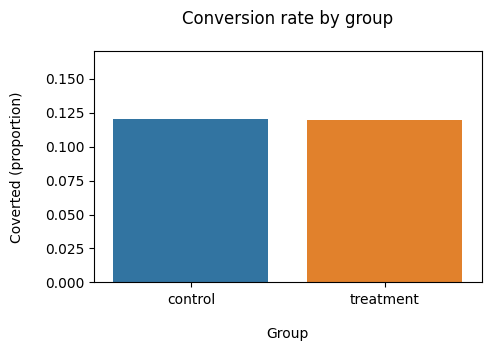

In [19]:
plt.figure(figsize=(5,3))
sns.barplot(x=ab_test['group'], y=ab_test['converted'], errorbar=('ci', False))

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Coverted (proportion)', labelpad=15);

- As taxas de conversão para nossos grupos são mesmo muito próximas. 
- Note também que a taxa de conversão para o grupo controle é menor do que esperaríamos, dado que nós sabemos sobre nossa taxa de conversão média (12.3 % e 13%).
- Isso mostra que há alguma variação nos dados ao amostrar de uma popilação.

- Então...o valor do grupo de tratamento é maio. Esta diferença é estatísticamente significante?

# Teste de hipótese - Chi-Quadrado

- O teste Chi Quadrado de Pearson é um teste de hipóteses estatístico utilizado para comparar duas variáveis categóricas, também conhecido como apenas Chi Quadrado ou Qui Quadrado ou \(\chi^2\). Muito utilizado para realizar comparações entre tratamentos de tabelas 2×2 (ou maiores).
- Devemos usar o teste Chi Quadrado de Pearson quando queremos comparar duas variáveis categóricas independentes entre si.
    - **H0**: p1 = p2
    - **H1**: p1 ≠ p2  
    

In [ ]:
# create contingency table (colocando os dados em um formato que o teste chi-quadrado aceita)
data_crosstab = pd.crosstab(ab_test['group'],
                            ab_test['converted'],
                           margins=True, margins_name="Total")
data_crosstab

In [ ]:
# create contingency table (colocando os dados em um formato que o teste chi-quadrado aceita) - Jeito do Meigaron - essa tabela do Meigaron ficou errada. Na tabela deveria constar a quantidade de convertidos e a quantidade de não convertidos, e não a quantidade total

df_table = ab_test[['group', 'converted']].groupby('group').agg( { 'converted': ['sum', 'count']})
df_table.columns = ['converted', 'total']
df_table

In [ ]:
# Chi_Quadrado - usando a tabela de contingência (data_crosstab)


chi2, pval, dof, expected = chi2_contingency(data_crosstab, correction=False)
print(f' p-value: {pval}\n')

if pval < 0.05:
    print(f'Rejeita a hipótese nula')
else:
    print(f'Aceita a hipótese nula')

## Teste de hipótese de acordo com o texto do medium "A/B testing: A step-by-step guide in Python"

- A última etapa da nossa análise é testar nossas hipóteses. Desde que nós temos uma amostra muito grande, nós podemos usar a aproximação normal para calcular nosso p-valor (isto é, z-teste)
- Novamente, Python faz todos os cálculos muito facilmente. Nós podemos usar o módulo statsmodels.stats.proportion para calcular o p-valor

In [ ]:
# Separando grupos de controle e de tratamento
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

# Contando quantas pessoas tem em cada grupo
n_con = control_results.count()   #4720
n_treat = treatment_results.count()  #4720

# Contando a quantidade de conversões em ambos os grupos
successes = [control_results.sum(), treatment_results.sum()]   #Lista com a conversão em cada grupo
nobs = [n_con, n_treat]   # Lista com o total de pessoas em cada grupo

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

# E se a conversão tivesse aumentado? Próximos passos

- Supondo que após fazermos os testes tenhamos chegado à conclusão de que a conversão da página nova em relação à pagina antiga tenha aumentado em 2%. Ou seja, a nova conversão é de 15%.
- É preciso converter esse valor de conversão para valores monetários, de forma a apresentar ao CEO quanto essa conversão representa em aumento financeiro para a empresa.

In [ ]:
# representando a conversão em R$

conv_pag_atual = 13%
conv_pag_nova = 15%

In [ ]:
# primeiro fazemos uma coṕia do df por segurança

df1 = df.copy()
df1.head()

In [ ]:
# Estimando a quantidade de clientes compram o produto diariamente e quantos visitantes a página tem diariamente (agora considerando todo o dataset)

# compradores = numero de visitantes diários * 0.13
# Gross Margin Values (GMV) = compradores * 4500 (valor do produto ou do ticket médio)

# Para isso, primeiro temos que modificar os dados da coluna timestamp de object para datetime, de forma a extrair a data 

df1['timestamp'] = pd.to_datetime(df1['timestamp']).apply(lambda x : x.strftime('%Y-%m-%d'))
df1.head()

In [ ]:
# Agora podemos agrupar os usuários por data para saber quantos clientes visitaram a página por dia

df2 = df1[['user_id','timestamp']].groupby( 'timestamp' ).count().reset_index()
df2.head()

In [ ]:
# Calculando os valores para a página corrente (conversão de 13%)

df2['current_purchase'] = np.ceil(df2['user_id'] * 0.13).astype(int)
df2['current_gmv'] = df2['current_purchase'] * 4500
current_gmv = df2['current_gmv'].sum()
print(f'Current GMV: {current_gmv}')

# Calculando os valores para a página nova (conversão de 15%)

df2['new_purchase'] = np.ceil(df2['user_id'] * 0.15).astype(int)
df2['new_gmv'] = df2['new_purchase'] * 4500
new_gmv = df2['new_gmv'].sum()
print(f'New GMV: {new_gmv}')

# De quanto foi o aumento em %
lift_gmv = ((new_gmv - current_gmv)/current_gmv)*100
print(f'Expected Lift GMV: {lift_gmv :.2f}%')

# De quanto foi o aumento em R$
lift_gmv_liq = (new_gmv - current_gmv)
print(f'Expectec Profit R${lift_gmv_liq :.2f}')

In [ ]:
df2.head()

# Teste Estatísticos - Exemplos

## Problema 01 - One sample t-test

- Suponha que uma bióloga gostaria de saber se a altura média de uma certa espécie de planta é igual a 15 cm.
- Ela coleta amostras aleatórias de 12 plantas e anota cada uma de suas alturas em cm.

- Dados:
    - tipo de dado: contínuo
    - Tipo de problema: diferença entre médias da mesma população
    - Teste: One sample t-test
        - hipótese nula: a altura médias das plantas é 15 cm.
        - hipótese alternativa: a altura média das plantas não é 15 cm.
        - significância: alpha = 0.05

In [ ]:
import random

In [ ]:
altura_plantas = [random.randrange(12, 18, 1) for i in range(12)]
altura_plantas

In [ ]:
np.mean(altura_plantas)

In [ ]:
# One sample t-test

# Para rodar o one sample t-teste nós usaremos oa função scipy.stats.ttest_1samp()
# O t-teste é calculado para a média de um conjunto de valores.
# A hipótese nula é que a média esperada das amostras de observações independentes seja igual a média da população especificada (popmean)
# Se o valor-p for menor que 0.05, devemos rejeitar a hipótese nula de que não há diferença entre as médias e concluir que existe uma diferença significativa. Se o valor-p for maior que 0.05, aceita a hipótese nula de que as médias são iguais

t_statistic, p_value = stats.ttest_1samp(a = altura_plantas, popmean = 15)
print(f'O p-valor encontrado foi {p_value}')

if p_value > 0.05:
    print(f'Como o p-valor é maior que a significância, aceitamos a hipótese nula de que não existe diferença significativa entre as médias')
else:
    print(f'Como o p-valor é menor que a significância, rejeitamos a hipótese nula de que não existe diferença significativa entre as médias')

## Problema 02 - Solução 1 (Condições paramétricas satisfeitas) Two sample t-test

- Pesquisadores gostariam de saber se duas espécies de plantas têm a mesma altura média. 
- Eles coletaram 20 amostras de cada espécie.
- **hipótese nula**: as alturas médias das espécies dos dois grupos são iguais.
- **hipótese alternativa**: as alturas médias das espécies dos dois grupos não são iguais .
- significância: alpha = 0.05

- Nesse caso é preciso checar se os grupos de amostras satisfazem as premissas para o teste de hipóteses (**condições paramétricas**):
    - as amostras são independentes;
    - os dados são normalmente distribuídos (Teste do Shapiro)
    - as variâncias dos dois grupos são iguais?
 

In [ ]:
# Fabricando os dados (está comentado pq se rodar outra vez os números mudam)
#altura_grupo1 = [random.randrange(8, 20, 1) for i in range(20)]
#altura_grupo2 = [random.randrange(8, 20, 1) for i in range(20)]


In [ ]:
altura_grupo1 = [18, 9, 9, 9, 16, 14, 13, 19, 18, 19, 8, 18, 17, 16, 13, 14, 17, 16, 11, 11]
altura_grupo2 = [17, 18, 14, 16, 14, 13, 10, 13, 18, 19, 8, 12, 14, 9, 18, 15, 13, 16, 11, 14]

In [ ]:
# Calculando as médias e as variâncias6

print(f'A altura média das amostras do grupo 1 é: {np.mean(altura_grupo1)}')
print(f'A variância do grupo 1 é {np.var(altura_grupo1)}')

In [ ]:
print(f'A altura média das amostras do grupo 2 é: {np.mean(altura_grupo2)}')
print(f'A variância do grupo 2 é {np.var(altura_grupo2)}')

In [ ]:
# condições paramétricas

# 1 - Dados normalmente distribuídos (teste do shapiro)
# O teste Shapiro-Wilk testa a hipótese nula de que os dados seguem uma distribuição normal
# significância 0.05
shapiro_test_g1, pvalue1 = stats.shapiro(altura_grupo1)
print(f'O p-valor do grupo de dados 1 é {pvalue1}')

if pvalue1 > 0.05: 
    print(f'O p-valor do grupo de dados 1 é maior que 0.05, portanto aceitamos a hipótese nula de que os dados seguem uma distribuição normal\n')
else:
    print(f'O p-valor do grupo de dados 1 é menor que 0.05, portanto rejeitamos a hipótese nula de que os dados seguem uma distribuição normal\n')

shapiro_test_g2, pvalue2 = stats.shapiro(altura_grupo2)
print(f'O p-valor do grupo de dados 2 é {pvalue2}')

if pvalue2 > 0.05: 
    print(f'O p-valor do grupo de dados 2 é maior que 0.05, portanto aceitamos a hipótese nula de que os dados seguem uma distribuição normal\n')
else:
    print(f'O p-valor do grupo de dados 2 é menor que 0.05, portanto rejeitamos a hipótese nula de que os dados seguem uma distribuição normal\n')


# 2 - Variâncias iguais
# O teste de Levene é usado para testar se k amostras foram coletadas de populações que possuem mesma variância.
# A hipótese nula é de que as variâncias são iguais
# significância 0.05
# o Meigaron disse que se dividir uma variância pela outra e o valor der menor que 4, significa que as variâncias são iguais

levene_test, pvalue = stats.levene(altura_grupo1, altura_grupo2, center='mean')
print(f'O p-valor para o teste de Levene é {pvalue}')

if pvalue > 0.05: 
    print(f'O p-valor para o teste de Levene é maior que 0.05, portanto aceitamos a hipótese nula de que as variâncias são iguais\n')
else:
    print(f'O p-valor para o teste de Levene é menor que 0.05, portanto rejeitamos a hipótese nula de que as variâncias são iguais\n')

# 3 - Amostras independentes
# Não tem teste pra isso? 


# Considerou que as três suposições foram satisfeitas, então usou o two sample t-test


In [ ]:
# Aplicação do two sample t-test

statistic_ts, p_value_ts = stats.ttest_ind(a=altura_grupo1, b=altura_grupo2, equal_var=True)
print(f'O p-valor do two sample t-test é {p_value_ts}')

if p_value_ts > 0.05:
    print(f'Como o p-valor é maior que a significância (0.05), aceitamos a hipótese nula de que as médias são iguais')
else:
    print(f'Como o p-valor é menor que a significância (0.05), rejeitamos a hipótese nula de que as médias são iguais')

## Problema 02 - Solução 2 (Condições paramétricas não satisfeitas) Mann-Whitney U-test ou Welch's test

- Pesquisadores gostariam de saber se duas espécies de plantas têm a mesma altura média.

- Eles coletaram 20 amostras de cada espécie.

- **hipótese nula**: as alturas médias das espécies dos dois grupos são iguais.

- **hipótese alternativa**: as alturas médias das espécies dos dois grupos não são iguais .

- significância: alpha = 0.05

- Quando se dispõe de uma amostra pequena e a variável numérica não apresenta sabidamente uma variação normal (ou não dá para ser verificada satisfatoriamente), ou ainda, quando não há homogeneidade das variâncias, o teste t não é apropriado. 

- Nessa situação, pode-se utilizar o teste não paramétrico de **Mann-Whitney**. O teste de Mann-Whitney (Wilcoxon rank-sum test) é indicado para comparação de dois grupos não pareados para se verificar se pertencem ou não à mesma população e cujos requisitos para aplicação do teste t de Student não foram cumpridos. 

- Uma outra alternativa é aplicar o **Welch's t-test** para comparar dois grupos tendo variâncias diferentes

In [ ]:
# Fabricando os dados 

altura_grupo1 = np.array([14, 15, 15, 16, 13, 8, 14,17, 16, 14, 19, 20, 21, 15, 15, 16, 14, 9, 10, 15])
altura_grupo2 = np.array([36, 37, 44, 27, 24, 28, 27, 39, 29, 24, 37, 32, 24, 26, 33, 32, 25, 18, 21, 35])

In [ ]:
# Calculando as médias dos dois grupos (perceba que em um deles existe um outlier)

print(f'A média do grupo 1 é {np.mean(altura_grupo1)}')
print(f'A média do grupo 2 é {np.mean(altura_grupo2)}')
print(f'A variância do grupo 1 é {np.var(altura_grupo1)}')
print(f'A variância do grupo 2 é {np.var(altura_grupo2)}')

In [ ]:
# condições paramétricas

# 1 - Dados normalmente distribuídos (teste do shapiro)
# O teste Shapiro-Wilk testa a hipótese nula de que os dados seguem uma distribuição normal
# significância 0.05
shapiro_test_g1, pvalue1 = stats.shapiro(altura_grupo1)
print(f'O p-valor do grupo de dados 1 é {pvalue1}')

if pvalue1 > 0.05: 
    print(f'O p-valor do grupo de dados 1 é maior que 0.05, portanto aceitamos a hipótese nula de que os dados seguem uma distribuição normal\n')
else:
    print(f'O p-valor do grupo de dados 1 é menor que 0.05, portanto rejeitamos a hipótese nula de que os dados seguem uma distribuição normal\n')

shapiro_test_g2, pvalue2 = stats.shapiro(altura_grupo2)
print(f'O p-valor do grupo de dados 2 é {pvalue2}')

if pvalue2 > 0.05: 
    print(f'O p-valor do grupo de dados 2 é maior que 0.05, portanto aceitamos a hipótese nula de que os dados seguem uma distribuição normal\n')
else:
    print(f'O p-valor do grupo de dados 2 é menor que 0.05, portanto rejeitamos a hipótese nula de que os dados seguem uma distribuição normal\n')


# 2 - Variâncias iguais 
# O teste de Levene é usado para testar se k amostras foram coletadas de populações que possuem mesma variância.
# A hipótese nula é de que as variâncias são iguais
# significância 0.05
# o Meigaron disse que se dividir uma variância pela outra e o valor der menor que 4, significa que as variâncias são iguais

levene_test, pvalue = stats.levene(altura_grupo1, altura_grupo2, center='mean')
print(f'O p-valor para o teste de Levene é {pvalue}')

if pvalue > 0.05: 
    print(f'O p-valor para o teste de Levene é maior que 0.05, portanto aceitamos a hipótese nula de que as variâncias são iguais\n')
else:
    print(f'O p-valor para o teste de Levene é menor que 0.05, portanto rejeitamos a hipótese nula de que as variâncias são iguais\n')

# 3 - Amostras independentes
# Não tem teste pra isso? 


# Considerou que as três suposições foram satisfeitas, então usou o two sample t-test

In [ ]:
# Como, apesar de ambos os grupos seguirem a distribuição normal, as variâncias são diferentes, vamos aplicar o teste não paramétrico Mann Whitney:

statistics_mw, pvalue_mw = stats.mannwhitneyu(altura_grupo1, altura_grupo2, alternative='two-sided')

print(f'O p-valor para o teste de Mann_Whitney é de: {pvalue_mw}')

if pvalue_mw > 0.05:
    print(f'Como o p-valor é maior que a significância (0.05), aceitamos a hipótese nula de que as médias são iguais')
else:
    print(f'Como o p-valor é menor que a significância (0.05), rejeitamos a hipótese nula de que as médias são iguais')

In [ ]:
# Alternativamente, vamos aplicação do two sample t-test (usando False para equal_var)

statistic_ts, p_value_ts = stats.ttest_ind(a=altura_grupo1, b=altura_grupo2, equal_var=False)
print(f'O p-valor do two sample t-test é {p_value_ts}')

if p_value_ts > 0.05:
    print(f'Como o p-valor é maior que a significância (0.05), aceitamos a hipótese nula de que as médias são iguais')
else:
    print(f'Como o p-valor é menor que a significância (0.05), rejeitamos a hipótese nula de que as médias são iguais')

In [ ]:
# # Aplicando o Welch's test

statistic_w, pvalue_w = stats.ttest_ind(altura_grupo1, altura_grupo2, equal_var = False)
print(f'O p-valor para o teste de Welch é {pvalue_w}')

if pvalue_w > 0.05:
    print(f'Como o p-valor é maior que a significância (0.05) aceitamos a Hipótese Nula de que as médias são iguais')
else:
    print(f'Como o p-valor é menor que a significância (0.05) rejeitamos a Hipótese Nula de que as médias são iguais')

## Problema 03 - One-Way-ANOVA e teste de Tukey

- Pesquisadores gostariam de saber se existe uma diferença entre as médias de 4 grupos que foram submetidos a tratamentos diferentes;
- Nesse caso temos:
    - Tipo de dado: contínuo;
    - Relação ou diferença? diferença;
    - Diferença de quê? médias;
    - Quantos grupos: + de 2;
    - Se a condições paramétricas forem satisfeitas = **One-way-ANOVA** (Basicamente, este método informa se existe um tratamento discrepante dentre os demais. Entretanto, ele exige que algumas premissas sejam atendidas, como: distribuição normal dos resíduos e homogeneidade de variância).
    - Se as condições paramétricas não forem satisfeitas = **Kruskal Wallis test**
- Os testes estatísticos citados acima não mostram qual das médias é diferente, caso haja diferença entre as médias. Dessa forma, temos que usar um teste PÓS ANÁLISE para verificar qual das médias é a problemática.

In [ ]:
# Fabricando os dados

df = pd.DataFrame( { 'A': [25,30,28,36,29],
                     'B': [45,55,29,56,40],
                     'C': [30,29,33,37,27],
                     'D': [54,60,51,62,73]})
df

In [ ]:
# Calculando as médias e as variâncias

media1 = np.mean(df['A'])
var1 = np.var(df['A'])
print(f'Média1 = {media1} e Var1 = {var1}')

media2 = np.mean(df['B'])
var2 = np.var(df['B'])
print(f'Média2 = {media2} e Var2 = {var2}')

media3 = np.mean(df['C'])
var3 = np.var(df['C'])
print(f'Média3 = {media3} e Var3 = {var3}')

media4 = np.mean(df['D'])
var4 = np.var(df['D'])
print(f'Média4 = {media4} e Var4 = {var4}')

In [ ]:
# Verificando as condições paramétricas

# condições paramétricas

# 1 - Dados normalmente distribuídos (teste do shapiro)

shapiro_test_g1, pvalue1 = stats.shapiro(df['A'])
print(f'O p-valor do grupo de dados 1 é {pvalue1}')

shapiro_test_g2, pvalue2 = stats.shapiro(df['B'])
print(f'O p-valor do grupo de dados 2 é {pvalue2}')

shapiro_test_g2, pvalue2 = stats.shapiro(df['C'])
print(f'O p-valor do grupo de dados 2 é {pvalue2}')

shapiro_test_g2, pvalue2 = stats.shapiro(df['D'])
print(f'O p-valor do grupo de dados 2 é {pvalue2}')

# Todos os grupos seguem a distribuição normal


# 2 - Variâncias iguais
levene_test, pvalue = stats.levene(df['A'], df['B'], df['C'], df['D'], center='mean')
print(f'O p-valor para o teste de Levene é {pvalue}')

# As variâncias são estatísticamente iguais

In [ ]:
# Transformando o dataframe em uma forma que será usada no teste de tukey (mais tarde)

df_melt = pd.melt(df.reset_index(), id_vars = ['index'], value_vars = ['A', 'B', 'C', 'D'])
df_melt.columns = ['index', 'treatment', 'values']
df_melt.head()

In [ ]:
# Plotando gráficos para a visualização das médias

sns.boxplot(x='treatment', y='values', data=df_melt)
sns.swarmplot(x='treatment', y='values', data=df_melt)

In [ ]:
# Aplicando o One-Way-Anova

# One-way ANOVA é um teste que é usado para identificar se existe uma diferença estatísticamente significante entre os valores médios de mais de um grupo.

    #H0: As médias de todos os grupos são iguais;
    #H1: Existe pelo menos uma média que difere do restante;

stats, pvalue = f_oneway(df['A'], df['B'], df['C'], df['D'])
print(f'o pvalor é {pvalue}')

# Nossa ANOVA resultou em um p-valor menor que 5%, portanto, temos evidências de que ao menos um tratamento se diferencia dos demais. Isso já é uma resposta, mas pouco acrescenta à nossa pesquisa pois queremos saber quem é este tratamento discrepante. Ou melhor, queremos poder comparar os tratamentos entre si e verificar quais são estatisticamente iguais ou diferentes.


In [ ]:
# Para esta abordagem existem alguns testes de médias e cada um tem uma particularidade, mas de longe o mais utilizado é o de Tukey. A interpretação do teste de Tukey é simples. Após determinarmos a diferença mínima significativa (ou Honest Significant Difference - HSD), podemos julgar se as médias são iguais ou não. Em termos práticos, esse valor nos dá uma margem de igualdade, pois se a diferença entre dois tratamentos for maior do que isso, os médias são diferentes.

# Realizando o teste tukey
tukey = pairwise_tukeyhsd(endog=df_melt['values'],
                          groups=df_melt['treatment'],
                          alpha=0.05)

#mostrando os resultados do teste
print(tukey)

In [ ]:
# Como interpretar o resultado:

# P-value para a diferença nas médias entre a and b: .0251
# P-value para a diferença nas médias entre a and c: .9867
# P-value para a diferença nas médias entre a and d: .0001
# P-value para a diferença nas médias entre b and c: .0482
# P-value para a diferença nas médias entre b and d: .0296
# P-value para a diferença nas médias entre c and d: .0001

# Ou seja, existe uma diferença estatística significante apenas entre as médias de a e c.